# Tutoriel d'exemple de résolution d'un problème de machine learning

## Problématique étudiée

La problématique étudiée est le cas avec le dataset iris. L'objectif est de trouver des groupes de fleurs, sans information préalable sur le type de fleur disponible dans le dataset (de manière aveugle).

Ce notebook va vous guider à travers ce cas, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : les *K-moyennes* (ou *K-means* en anglais). Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

<font color="green">Tu as expliqué le problème à résoudre en début de tutoriel, c'est plutôt pas mal (attention à ça sur les autres tutoriels)</font>

## Code

### Importation des différentes librairies 

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Importation du dataset 

La première étape est d'importer le dataset et de voir de quoi il est constitué. Ici on importe le dataset iris.

In [2]:
data, labels = load_iris(return_X_y=True)
(n_samples, n_features), n_iris = data.shape, np.unique(labels).size

print(f"# iris: {n_iris}; # samples: {n_samples}; # features {n_features}")


# iris: 3; # samples: 150; # features 4


### Création de la Fonction utilisant K-means

Dans la premiere partie du code on execute kmean grace a Fit et nous calculons inertia(fonction cout)

<font color="green">Avant de coder, il faudrait peut-être expliquer (en vulgarisant) en quoi consiste la méthode des k-means. De plus on ne comprend pas cette phrase parce que tu n'expliques pas ce qu'est 'inertia'</font>

Ajout des metriques dans clustering_metrics.

Création d'un silhouette score, si la valeurs est négative, le point est en moyenne plus proche du groupe voisin que du sien : il est donc mal classé. À l'inverse, si cette valeurs est positive,il est bien classé.

In [3]:
def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

Dans cette patie,nous choisisons le type d'initialisation grace a init, Pour le nombre d'executions nnous utilisons n_init.
Pour finir random_state, nous permet d'obtenir a chaque relance des resultats différent.

<font color="green">Même commentaire qu'au-dessus : l'initialisation de quoi ? Le lecteur est censé être débutant, il ne saurait pas de quoi on parle ici. Il est important de prendre le temps de parler du modèle des k-means et de son fonctionnement, dans les grandes lignes en tout cas</font>

Le tableau nous retourne le temps d'exécution ainsi que la valeur d'inertia

<font color="green">Même commentaire qu'avant : à quoi correspond intertia ?</font>

In [4]:
print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_iris, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_iris, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_iris).fit(data)
kmeans = KMeans(init=pca.components_, n_clusters=n_iris, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k-means++	0.322s	140	0.659	0.660	0.659	0.620	0.655	0.506


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


random   	0.261s	140	0.659	0.660	0.659	0.620	0.655	0.506
PCA-based	0.099s	191	0.535	0.657	0.590	0.433	0.584	0.519
__________________________________________________________________________________


C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<font color="green">Deux choses ici :
    <ul>
    <li>On ne comprend pas bien à quoi correspondent tous ces nombres. Il aurait peut-être fallu une phrase ou deux pour dire lesquels d'entre eux sont pertinents et, si ce n'est pas trop technique, à quoi correspondent les nombres qui nous intéressent</li>
    <li>En règle générale il vaut mieux essayer d'enlever les warnings. Pour ça tu peux les désactiver (comme tu l'as fait sur un autre tutoriel) mais ce n'est pas la meilleure solution car tu peux passer à côté d'avertissements importants. La solution idéale serait de corriger le problème mentionné dans l'avertissement, ici en ajoutant %env OMP_NUM_THREADS=1 au début de ton notebook.</li>
    </ul></font>

PCA (Principal component analysis ou Analyse en composantes principales) permet la réduction de la dimensionnalité linéaire à l'aide de la décomposition en valeurs singulières des données pour les projeter dans un espace de dimension inférieure.

<font color="green">Tu pourrais peut-être reformuler cette phrase avec tes propres mots, là ce n'est pas très digeste je trouve</font>

Kmeans++ permet d'éparpiller le plus possible le centroide dans le jeu de donnée

random permet d'initialisation de manière totalement aléatoire 

Pca-based permet interpreter les donnés pour les mettre en 2D(au lieu de 4D) et de calculer les centroides en une seule fois
 
fit est une méthode qui permet d'exécuté l'algorithme kmeans.

h nous permet de determiné la taille du maillage.

Z nous permet de le centroids le plus proches grace a la methode predict(X).

Ensuite des centroids au scatter.(chaque point du dataset est affecté au centroid le plus proche, ensuite le centroid est déplacé au milieu du cluster(la ou se situe le moyenne des points)).

<font color="green">Il faudrait peut-être commencer par définir ce qu'est un centroïde. Sinon tu as plutôt bien pris le temps d'expliquer les différents points, c'est plutôt pas mal</font>

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


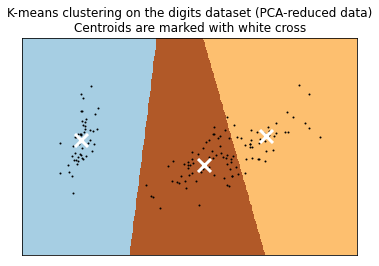

In [5]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_iris, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

<font color="green">Ici, tu pourrais peut-être ajouter une ou deux phrases pour interpréter les résultats présentés sur le graphe, sinon on ne sait pas trop ce qu'on regarde.</font>

#### Ceci conclut notre tutoriel, et sentez-vous libre de jouer avec les paramètres du modèle pour mieux le comprendre !

<font color="green">Globalement je trouve que ce tutoriel gagnerait à être complété avec plus d'explications, là on ne comprend pas toujours ce que tu fais. Penser aussi à essayer d'enlever les warnings quand c'est possible. Ceci dit on voit que tu as quand même fait des efforts pour expliquer le contenu du code et le graphe obtenu au final est très beau 😮</font>